In [1]:
from utility import *
from sklearn.mixture import BayesianGaussianMixture

PCA dataframes load 

In [2]:
dfs,y=load_PCA_dfs(200)

  0%|          | 0/20 [00:00<?, ?it/s]

Estimator

In [3]:
estimator=BayesianGaussianMixture(covariance_type="diag",max_iter=2000)

Tuning of n_components hyperparameter

In [4]:
results,best_indexes,fitted_estimators=get_results(dfs,y,estimator,True,"n_components",[x for x in range(5,16)])

Total result:   0%|          | 0/1 [00:00<?, ?it/s]

PCA_2:   0%|          | 0/11 [00:00<?, ?it/s]

In [5]:
results

{2:     n_components  rand index
 0              5    0.729126
 1              6    0.756537
 2              7    0.804346
 3              8    0.797991
 4              9    0.818512
 5             10    0.848701
 6             11    0.848518
 7             12    0.849144
 8             13    0.851680
 9             14    0.862678
 10            15    0.850910}

In [6]:
results[182].iloc[best_indexes[182]]

KeyError: 182

In [7]:
fitted_estimators

{2: BayesianGaussianMixture(covariance_type='diag', max_iter=2000, n_components=14)}

2D PCA plot

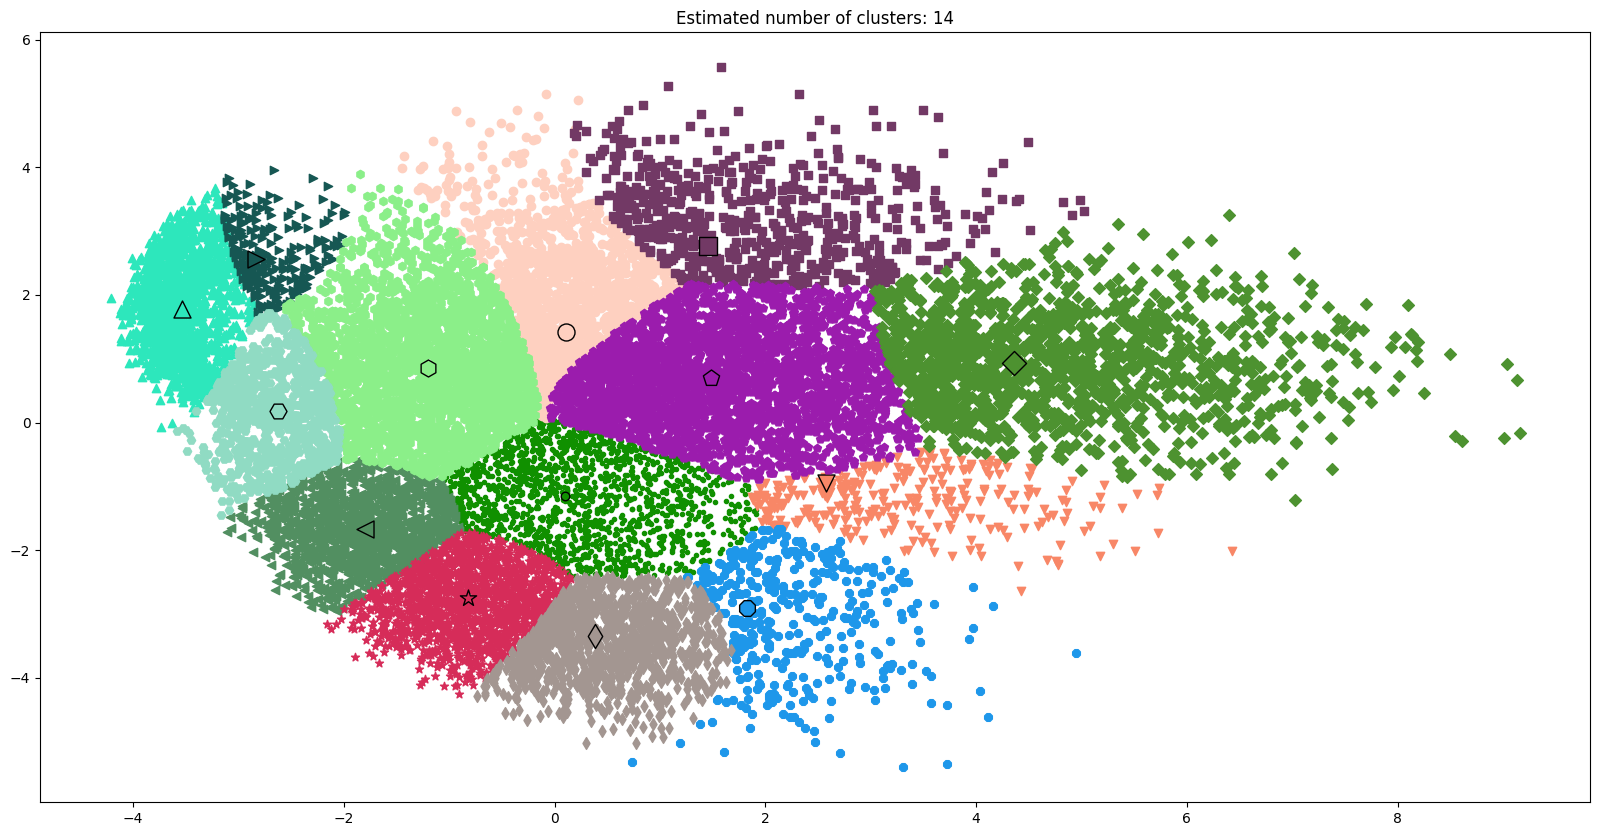

In [8]:
labels = fitted_estimators[2].predict(dfs[2])
means = fitted_estimators[2].means_

plot_clustering(dfs[2],labels=labels,cluster_centers=means)

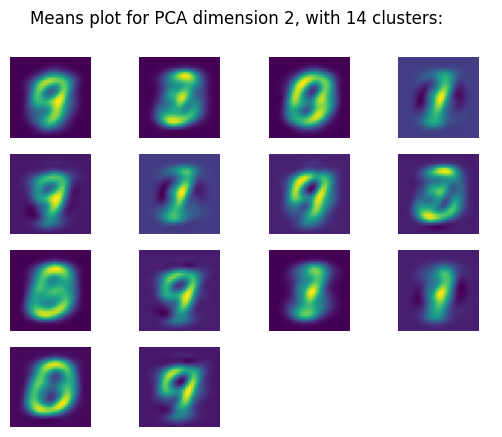

In [13]:
from math import ceil
import pickle

def plot_means(n_pc, means):
    
    with open("pca/pca_"+str(n_pc)+".pkl", 'rb') as inp:
        pca=pickle.load(inp)
        
    data=pca.inverse_transform(means)
    
    fig,axs=plt.subplots(ceil(len(means)/4),4)
    
    fig.suptitle(f"Means plot for PCA dimension {n_pc}, with {len(means)} clusters:")
    
    axs = [item for sublist in axs for item in sublist]
    
    for i in range(len(axs)):
        axs[i].axis('off')
        
    for i,mean in enumerate(data):
        axs[i].imshow(mean.reshape(28, 28))

#for x in range(2,200,10):
    #plot_means(x,fitted_estimators[x].means_)
    
plot_means(2,fitted_estimators[2].means_)